# Binary Data 

In [54]:
## need this 

from astropy.io import fits
import matplotlib.pyplot as plt 

file = fits.open('Project 1/all_columns_catalog_shift.fits') 
hdr = file[0].header
data = file[1].data


In [55]:
## need this 
cols = data.columns

In [56]:
## for data, each row corresponds to a binary pair. For every row, data about each star is entered one after the other.
## For example, the first two entries in a row are the same type of data, with one corresponding to each star 

In [57]:
import numpy as np
WDWD = data[np.nonzero(data['binary_type'] == 'WDWD')] 


In [58]:
type(WDWD)

astropy.io.fits.fitsrec.FITS_rec

In [59]:
from astropy import units as u

def absolute_mag(rel_mag, parallax):
    """Provide this function with relative magnitude and parallax in mas
    """
    parsec = (parallax*u.mas).to(u.pc, equivalencies=u.parallax())
    return rel_mag - 5*np.log10(parsec/(10*u.pc))

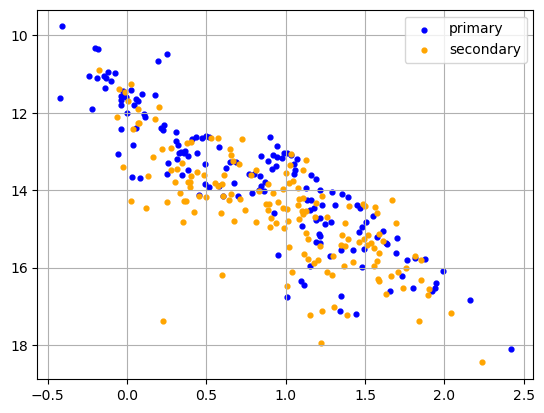

In [60]:
## need this 
from astropy.table import QTable, Table, Column

data_rows = WDWD
table = Table(rows=data_rows, names=cols.names)

for i in [1, 2]:
    for col in ['phot_g_mean_mag', 'phot_bp_mean_mag', 'phot_rp_mean_mag']:

        colname = col + str(i)
        new_colname = col + '_abs' + str(i)
        dist = table['parallax' + str(i)]

        table[new_colname] = absolute_mag(table[colname], dist)

G1 = table['phot_g_mean_mag_abs1']
BPRP1 = table['phot_bp_mean_mag_abs1'] - table['phot_rp_mean_mag_abs1']

plt.scatter(BPRP1, G1, 12, color='blue', label='primary')

G2 = table['phot_g_mean_mag_abs2']
BPRP2 = table['phot_bp_mean_mag_abs2'] - table['phot_rp_mean_mag_abs2']

plt.scatter(BPRP2, G2, 12, color='orange', label='secondary')

ax = plt.gca()
ax.set_ylim(ax.get_ylim()[::-1])
plt.grid(which='both')
plt.legend()

In [61]:
table

solution_id1,solution_id2,source_id1,source_id2,random_index1,random_index2,ref_epoch1,ref_epoch2,ra1,ra2,ra_error1,ra_error2,dec1,dec2,dec_error1,dec_error2,parallax1,parallax2,parallax_error1,parallax_error2,parallax_over_error1,parallax_over_error2,pm1,pm2,pmra1,pmra2,pmra_error1,pmra_error2,pmdec1,pmdec2,pmdec_error1,pmdec_error2,ra_dec_corr1,ra_dec_corr2,ra_parallax_corr1,ra_parallax_corr2,ra_pmra_corr1,ra_pmra_corr2,ra_pmdec_corr1,ra_pmdec_corr2,dec_parallax_corr1,dec_parallax_corr2,dec_pmra_corr1,dec_pmra_corr2,dec_pmdec_corr1,dec_pmdec_corr2,parallax_pmra_corr1,parallax_pmra_corr2,parallax_pmdec_corr1,parallax_pmdec_corr2,pmra_pmdec_corr1,pmra_pmdec_corr2,astrometric_n_obs_al1,astrometric_n_obs_al2,astrometric_n_obs_ac1,astrometric_n_obs_ac2,astrometric_n_good_obs_al1,astrometric_n_good_obs_al2,astrometric_n_bad_obs_al1,astrometric_n_bad_obs_al2,astrometric_gof_al1,astrometric_gof_al2,astrometric_chi2_al1,astrometric_chi2_al2,astrometric_excess_noise1,astrometric_excess_noise2,astrometric_excess_noise_sig1,astrometric_excess_noise_sig2,astrometric_params_solved1,astrometric_params_solved2,astrometric_primary_flag1,astrometric_primary_flag2,nu_eff_used_in_astrometry1,nu_eff_used_in_astrometry2,pseudocolour1,pseudocolour2,pseudocolour_error1,pseudocolour_error2,ra_pseudocolour_corr1,ra_pseudocolour_corr2,dec_pseudocolour_corr1,dec_pseudocolour_corr2,parallax_pseudocolour_corr1,parallax_pseudocolour_corr2,pmra_pseudocolour_corr1,pmra_pseudocolour_corr2,pmdec_pseudocolour_corr1,pmdec_pseudocolour_corr2,astrometric_matched_transits1,astrometric_matched_transits2,visibility_periods_used1,visibility_periods_used2,astrometric_sigma5d_max1,astrometric_sigma5d_max2,matched_transits1,matched_transits2,new_matched_transits1,new_matched_transits2,matched_transits_removed1,matched_transits_removed2,ipd_gof_harmonic_amplitude1,ipd_gof_harmonic_amplitude2,ipd_gof_harmonic_phase1,ipd_gof_harmonic_phase2,ipd_frac_multi_peak1,ipd_frac_multi_peak2,ipd_frac_odd_win1,ipd_frac_odd_win2,ruwe1,ruwe2,scan_direction_strength_k11,scan_direction_strength_k12,scan_direction_strength_k21,scan_direction_strength_k22,scan_direction_strength_k31,scan_direction_strength_k32,scan_direction_strength_k41,scan_direction_strength_k42,scan_direction_mean_k11,scan_direction_mean_k12,scan_direction_mean_k21,scan_direction_mean_k22,scan_direction_mean_k31,scan_direction_mean_k32,scan_direction_mean_k41,scan_direction_mean_k42,duplicated_source1,duplicated_source2,phot_g_n_obs1,phot_g_n_obs2,phot_g_mean_flux1,phot_g_mean_flux2,phot_g_mean_flux_error1,phot_g_mean_flux_error2,phot_g_mean_flux_over_error1,phot_g_mean_flux_over_error2,phot_g_mean_mag1,phot_g_mean_mag2,phot_bp_n_obs1,phot_bp_n_obs2,phot_bp_mean_flux1,phot_bp_mean_flux2,phot_bp_mean_flux_error1,phot_bp_mean_flux_error2,phot_bp_mean_flux_over_error1,phot_bp_mean_flux_over_error2,phot_bp_mean_mag1,phot_bp_mean_mag2,phot_rp_n_obs1,phot_rp_n_obs2,phot_rp_mean_flux1,phot_rp_mean_flux2,phot_rp_mean_flux_error1,phot_rp_mean_flux_error2,phot_rp_mean_flux_over_error1,phot_rp_mean_flux_over_error2,phot_rp_mean_mag1,phot_rp_mean_mag2,phot_bp_n_contaminated_transits1,phot_bp_n_contaminated_transits2,phot_bp_n_blended_transits1,phot_bp_n_blended_transits2,phot_rp_n_contaminated_transits1,phot_rp_n_contaminated_transits2,phot_rp_n_blended_transits1,phot_rp_n_blended_transits2,phot_proc_mode1,phot_proc_mode2,phot_bp_rp_excess_factor1,phot_bp_rp_excess_factor2,bp_rp1,bp_rp2,bp_g1,bp_g2,g_rp1,g_rp2,dr2_radial_velocity1,dr2_radial_velocity2,dr2_radial_velocity_error1,dr2_radial_velocity_error2,dr2_rv_nb_transits1,dr2_rv_nb_transits2,dr2_rv_template_teff1,dr2_rv_template_teff2,dr2_rv_template_logg1,dr2_rv_template_logg2,dr2_rv_template_fe_h1,dr2_rv_template_fe_h2,l1,l2,b1,b2,ecl_lon1,ecl_lon2,ecl_lat1,ecl_lat2,pairdistance,sep_AU,binary_type,Sigma18,R_chance_align,phot_g_mean_mag_abs1,phot_bp_mean_mag_abs1,phot_rp_mean_mag_abs1,phot_g_mean_mag_abs2,phot_bp_mean_mag_abs2,phot_rp_mean_mag_abs2
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

# Star formation times

In [77]:
import pandas as pd

binary_data = pd.read_csv('Project 1/Table_A1.csv')

# all in Gyr
age_cols = ['cool_ageH_1', 'cool_ageH_2', 'tot_age_1', 'tot_age_2']
age_data = binary_data.dropna(axis=0, subset=age_cols)[age_cols].copy()

age_data['form_time_1'] = age_data['tot_age_1'] - age_data['cool_ageH_1']
age_data['form_time_2'] = age_data['tot_age_2'] - age_data['cool_ageH_2']


In [72]:
binary_data

,System_Name,source_id_1,ra_1,dec_1,pmra_1,pmra_error_1,pmdec_1,pmdec_error_1,parallax_1,parallax_error_1,...,e_init_mass_lower_2,tot_age_2,e_tot_age_upper_2,e_tot_age_lower_2,sp_type_2,sp_type_source_2,sep_AU,wtd_par,e_wtd_par,R_chance_align
0,WDWD Gaia EDR3 1003080575370617728,1003080575370626944,105.987423,61.081866,79.320,0.437,-104.096,0.448,9.945,0.537,...,0.561,13.6651,51.4788,5.6627,NaN,NaN,658.372570,9.759,0.410,7.931599e-06
1,WDWD Gaia EDR3 100536353946761728,100536353946761728,32.022551,22.028459,36.249,0.823,-35.387,0.853,4.585,0.615,...,0.693,NaN,NaN,NaN,NaN,NaN,1677.455167,4.876,0.514,1.949616e-04
2,WDWD Gaia EDR3 1006533763440848256,1006533767732900736,90.732564,63.069167,-12.763,0.322,-24.957,0.378,4.843,0.475,...,0.447,58.1477,1404.0893,47.9153,NaN,NaN,620.838313,4.883,0.280,9.181447e-07
3,WDWD Gaia EDR3 1008929569208837376,1008929564913828224,134.822377,42.842096,6.107,0.257,-8.018,0.216,4.912,0.297,...,0.555,1.1826,0.6018,0.1748,DA,2014MNRAS.440.3184B,854.183094,5.118,0.180,6.642287e-06
4,WDWD Gaia EDR3 1013776353903292928,1013776353903292928,132.469801,47.213402,-83.780,0.065,-83.173,0.052,6.571,0.068,...,0.146,12.4604,9.0277,4.7986,DA,2014MNRAS.440.3184B,667.621073,6.536,0.057,2.446192e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586,WDWDMS Gaia EDR3 779305808516516864,779305808516517376,161.405538,40.093353,-74.030,0.222,21.608,0.250,7.229,0.270,...,0.078,NaN,NaN,NaN,DA,2011ApJ...730..128T,182.537698,6.995,0.030,NaN
1587,WDWDMS Gaia EDR3 929001808377561216,929001804082135168,121.683745,44.750870,3.085,0.150,-3.380,0.113,4.925,0.145,...,0.228,7.3797,7.7047,4.7975,DA,2014MNRAS.440.3184B,1023.430194,4.986,0.032,NaN
1588,WDWDWD Gaia EDR3 4190499986125543168,4190500054845023488,298.400111,-10.324860,-10.922,0.065,-15.783,0.039,7.663,0.061,...,0.366,1.6227,0.6127,0.2895,NaN,NaN,6485.176800,7.717,0.040,NaN
1589,WDWDWD Gaia EDR3 4190499986125543168,4190500054845023488,298.400111,-10.324860,-10.922,0.065,-15.783,0.039,7.663,0.061,...,0.160,13.9094,12.4852,5.8477,NaN,NaN,302.342604,7.717,0.040,NaN


Text(0, 0.5, 'Star 2')

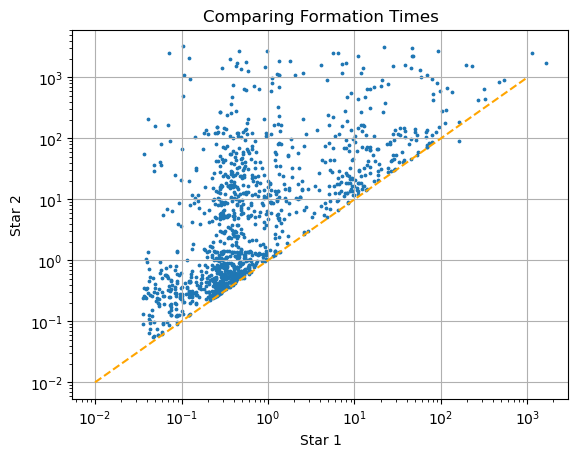

In [80]:
# Plot
plt.scatter(age_data['form_time_1'], age_data['form_time_2'], 3)
plt.loglog()

x = np.logspace(-2, 3, 6)
plt.plot(x, x, linestyle='dashed', color='orange')
plt.grid()

plt.title('Comparing Formation Times')
plt.xlabel('Star 1')
plt.ylabel('Star 2')